## Import Modules

In [3]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [4]:
paths = []
labels = []
for dirname, _, filenames in os.walk('TESS_Toronto_emotional_speech_set_data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [5]:
len(paths)

2800

In [6]:
paths[:5]

['TESS_Toronto_emotional_speech_set_data\\OAF_angry\\OAF_back_angry.wav',
 'TESS_Toronto_emotional_speech_set_data\\OAF_angry\\OAF_bar_angry.wav',
 'TESS_Toronto_emotional_speech_set_data\\OAF_angry\\OAF_base_angry.wav',
 'TESS_Toronto_emotional_speech_set_data\\OAF_angry\\OAF_bath_angry.wav',
 'TESS_Toronto_emotional_speech_set_data\\OAF_angry\\OAF_bean_angry.wav']

In [7]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [8]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,TESS_Toronto_emotional_speech_set_data\OAF_ang...,angry
1,TESS_Toronto_emotional_speech_set_data\OAF_ang...,angry
2,TESS_Toronto_emotional_speech_set_data\OAF_ang...,angry
3,TESS_Toronto_emotional_speech_set_data\OAF_ang...,angry
4,TESS_Toronto_emotional_speech_set_data\OAF_ang...,angry


In [9]:
df['label'].value_counts()

label
angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: count, dtype: int64

In [8]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

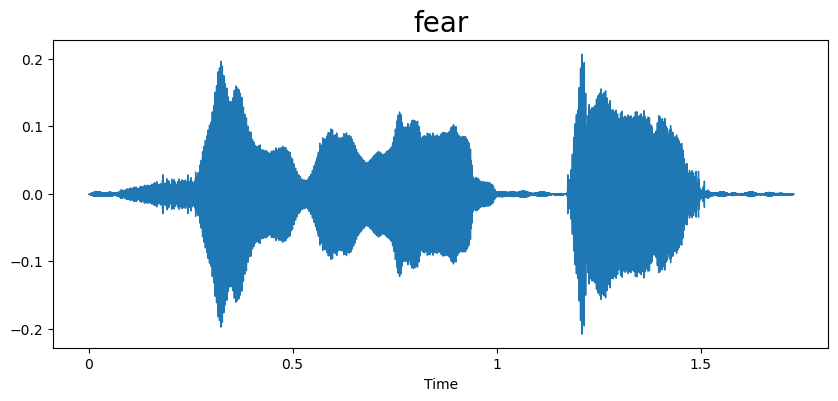

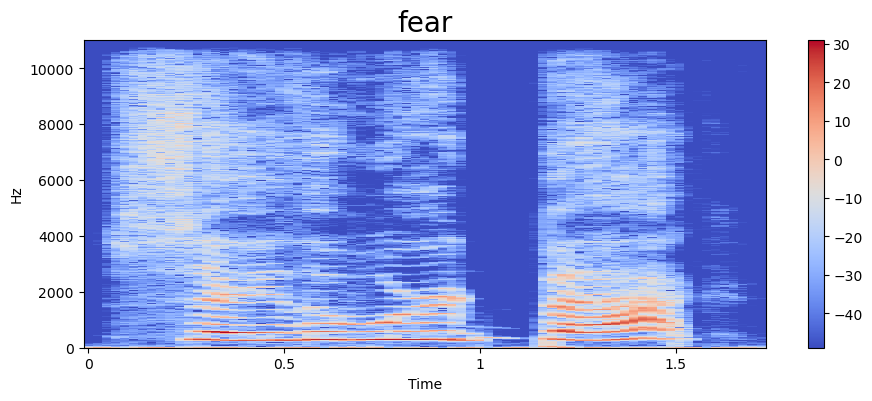

In [9]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

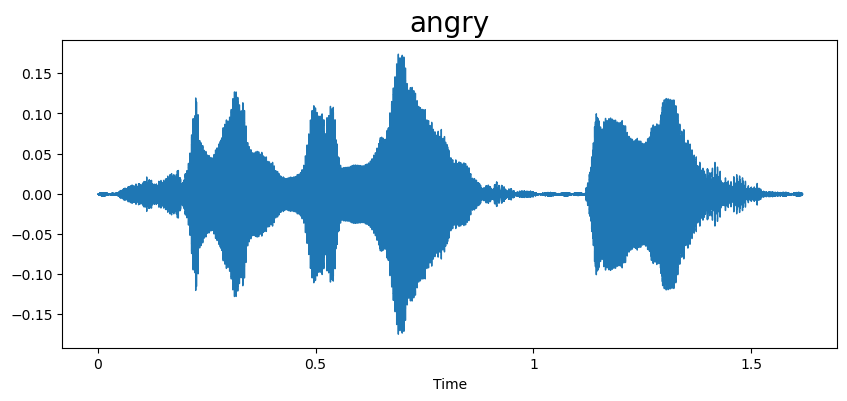

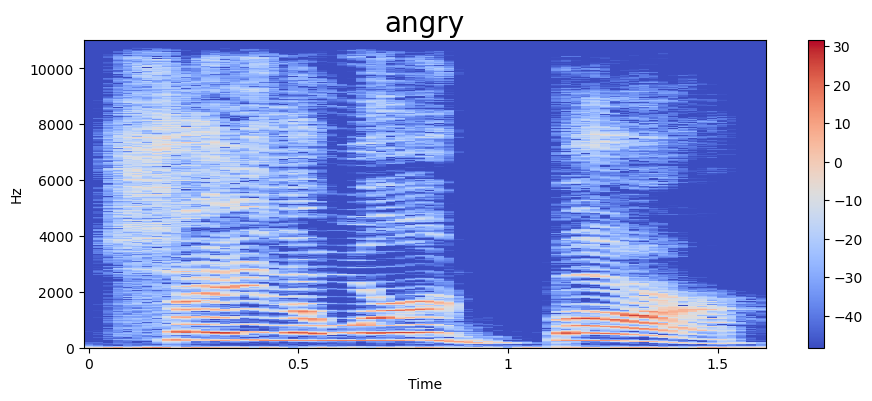

In [10]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

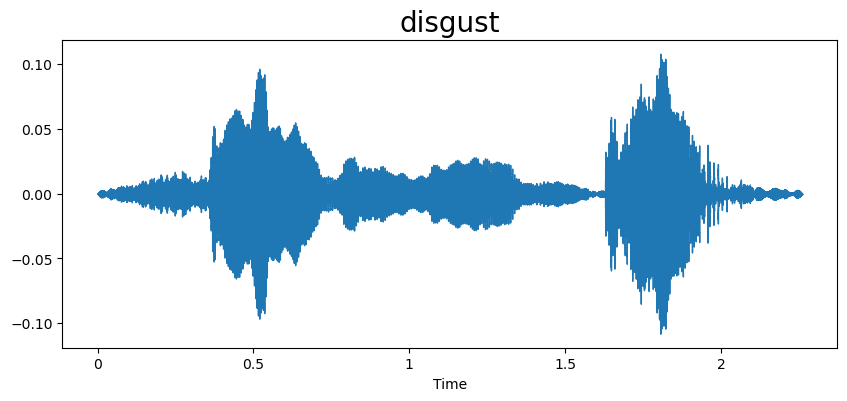

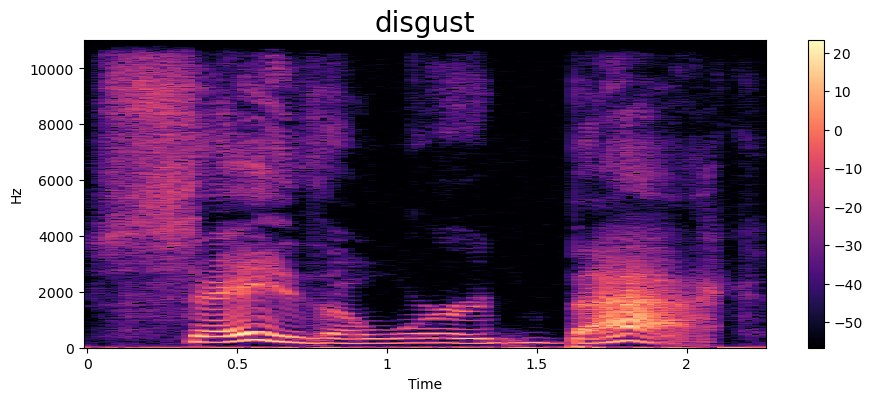

In [11]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

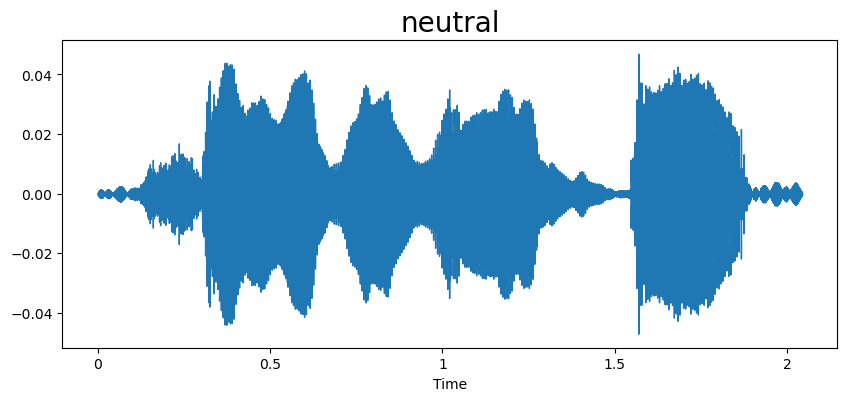

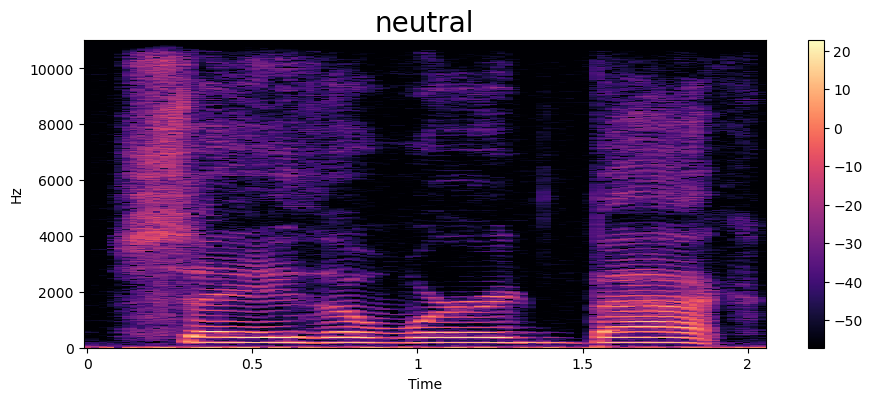

In [12]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

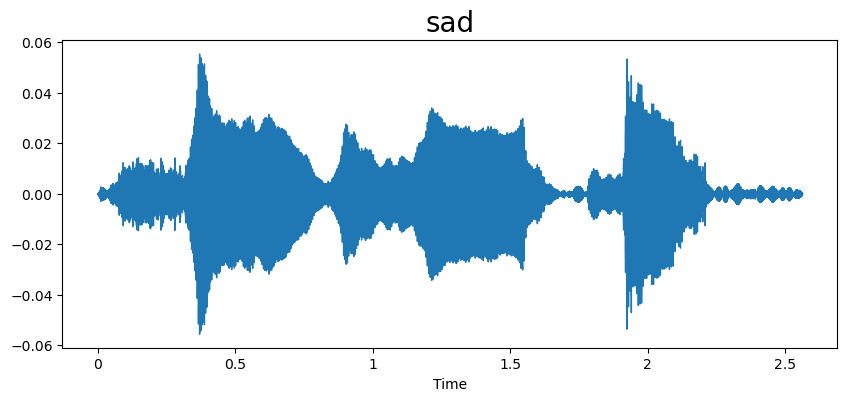

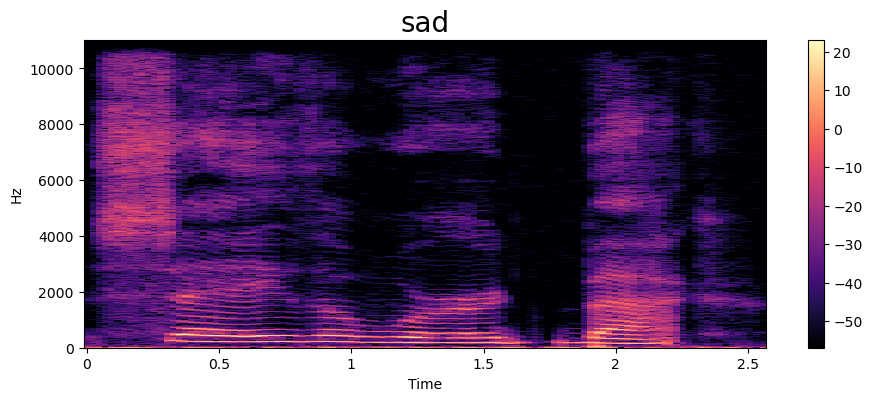

In [13]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

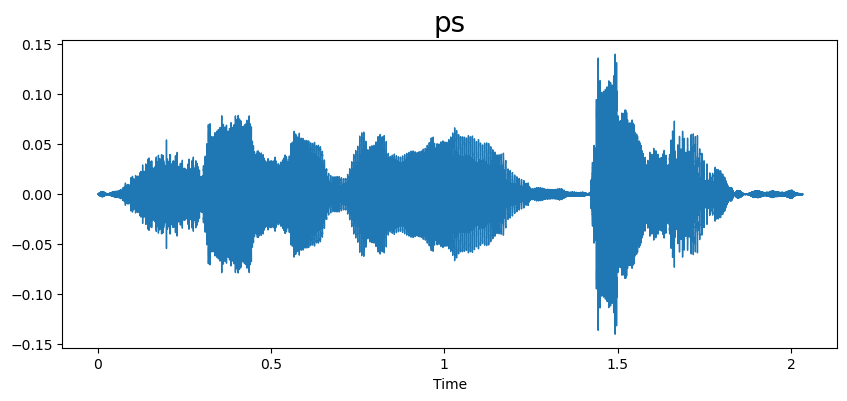

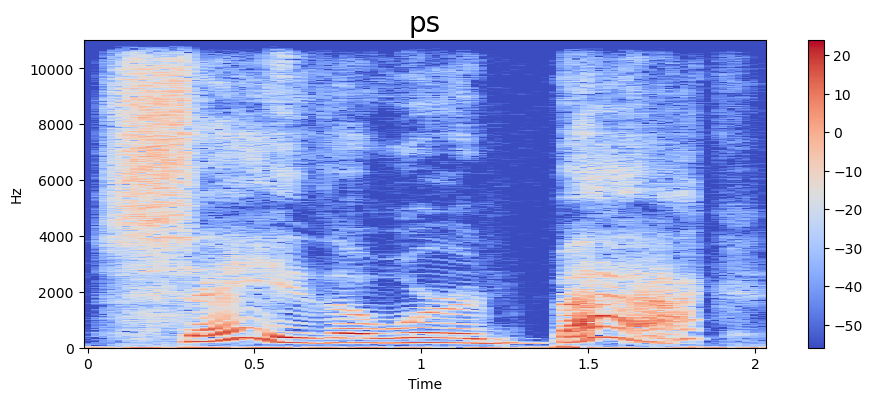

In [14]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

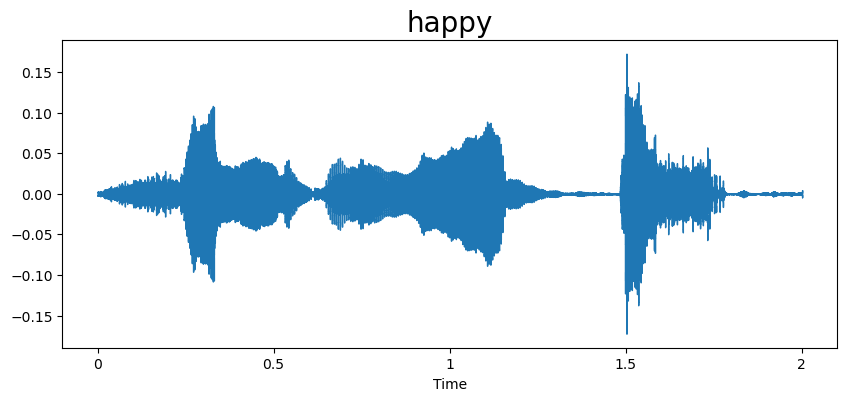

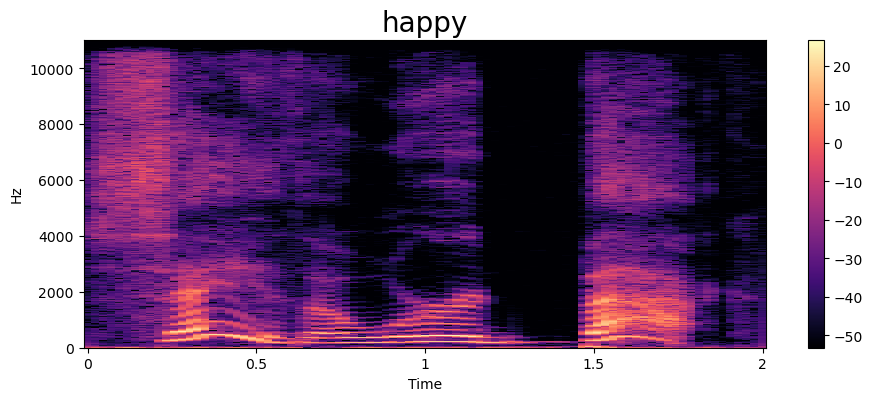

In [15]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [10]:
import numpy as np
import librosa
from scipy.signal import butter, lfilter
from IPython.display import Audio

def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def apply_lowpass_filter(data, cutoff_frequency, sampling_rate, order=5):
    b, a = butter_lowpass(cutoff_frequency, sampling_rate, order=order)
    filtered_data = lfilter(b, a, data)
    return filtered_data

# Load data
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)

# Apply low-pass filter
cutoff_frequency = 2000  # Adjust this as needed
filtered_data = apply_lowpass_filter(data, cutoff_frequency, sampling_rate)

# Play filtered audio
print("Filtered Audio (Low-pass Filtered with cutoff = {} Hz):".format(cutoff_frequency))
Audio(filtered_data, rate=sampling_rate)


Filtered Audio (Low-pass Filtered with cutoff = 2000 Hz):


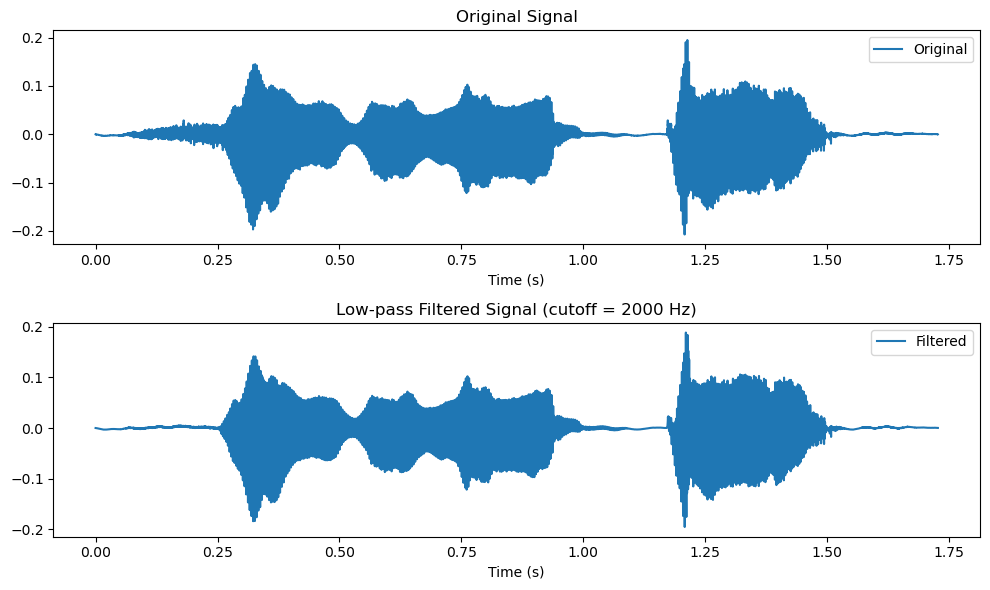

Filtered Audio:


In [17]:
import numpy as np
import librosa
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt
from IPython.display import Audio

def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def apply_lowpass_filter(data, cutoff_frequency, sampling_rate, order=5):
    b, a = butter_lowpass(cutoff_frequency, sampling_rate, order=order)
    filtered_data = lfilter(b, a, data)
    return filtered_data

# Load data
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)

# Apply low-pass filter
cutoff_frequency = 2000  
filtered_data = apply_lowpass_filter(data, cutoff_frequency, sampling_rate)

# Plot original and filtered signals
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.title('Original Signal')
plt.plot(np.arange(len(data)) / sampling_rate, data, label='Original')
plt.xlabel('Time (s)')
plt.legend()

plt.subplot(2, 1, 2)
plt.title('Low-pass Filtered Signal (cutoff = {} Hz)'.format(cutoff_frequency))
plt.plot(np.arange(len(filtered_data)) / sampling_rate, filtered_data, label='Filtered')
plt.xlabel('Time (s)')
plt.legend()

plt.tight_layout()
plt.show()



print("Filtered Audio:")
Audio(filtered_data, rate=sampling_rate)


## Feature Extraction

In [18]:
import librosa
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc




In [19]:


X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))
X = np.array(X_mfcc.tolist())
X = X.reshape(X.shape[0], X.shape[1], 1)

In [20]:
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']]).toarray()

In [21]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

## Create the LSTM Model

In [23]:
model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                

In [24]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/20


35/35 [==============================] - 13s 206ms/step - loss: 1.8504 - accuracy: 0.2531 - val_loss: 1.7373 - val_accuracy: 0.3411
Epoch 2/20
35/35 [==============================] - 6s 158ms/step - loss: 1.5319 - accuracy: 0.4000 - val_loss: 0.9273 - val_accuracy: 0.5679
Epoch 3/20
35/35 [==============================] - 5s 156ms/step - loss: 0.9842 - accuracy: 0.5888 - val_loss: 0.6913 - val_accuracy: 0.6982
Epoch 4/20
35/35 [==============================] - 5s 156ms/step - loss: 0.8008 - accuracy: 0.6777 - val_loss: 0.5797 - val_accuracy: 0.7643
Epoch 5/20
35/35 [==============================] - 5s 155ms/step - loss: 0.7514 - accuracy: 0.6991 - val_loss: 0.6435 - val_accuracy: 0.7429
Epoch 6/20
35/35 [==============================] - 5s 156ms/step - loss: 0.6581 - accuracy: 0.7415 - val_loss: 0.5437 - val_accuracy: 0.7732
Epoch 7/20
35/35 [==============================] - 5s 156ms/step - loss: 0.5706 - accuracy: 0.7933 - val_loss: 0.4115 - val_accuracy: 0.8500
Epo

In [25]:

epoch_val_accuracy = history.history['val_accuracy'][-1]
print(f"Validation Accuracy after the Last Epoch: {epoch_val_accuracy * 100:.2f}%")

Validation Accuracy after the Last Epoch: 95.00%


## Plot the results

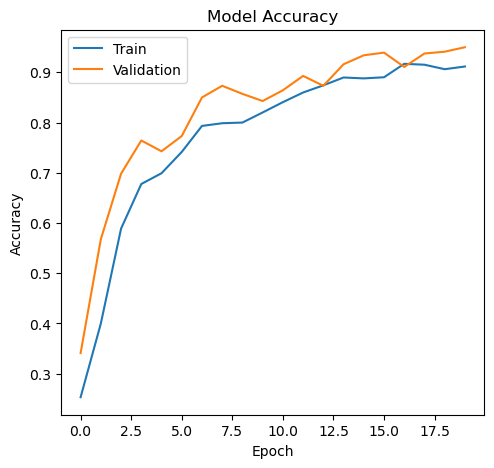

In [26]:
import matplotlib.pyplot as plt

# Training history
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')




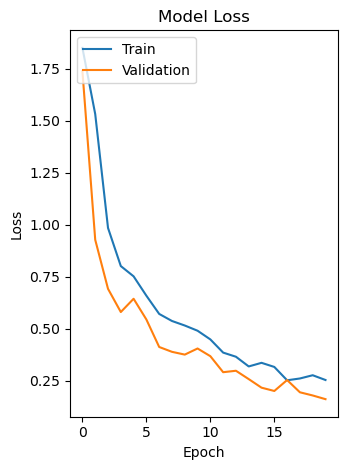

In [27]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [28]:
from sklearn.metrics import confusion_matrix
import numpy as np
y_pred = model.predict(X_val)
# Converting predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
# Converting one-hot encoded labels to their actual classes
y_true_classes = np.argmax(y_val, axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

print("Confusion Matrix:")
print(conf_matrix)


18/18 [==============================] - 2s 36ms/step
Confusion Matrix:
[[65  0  0  6  0  3  0]
 [ 0 73  0  2  1  0  2]
 [ 2  0 87  0  0  0  0]
 [ 1  1  0 72  0  3  0]
 [ 0  0  0  0 72  0  1]
 [ 0  1  0  2  0 84  0]
 [ 1  2  0  0  0  0 79]]


18/18 [==============================] - 1s 35ms/step


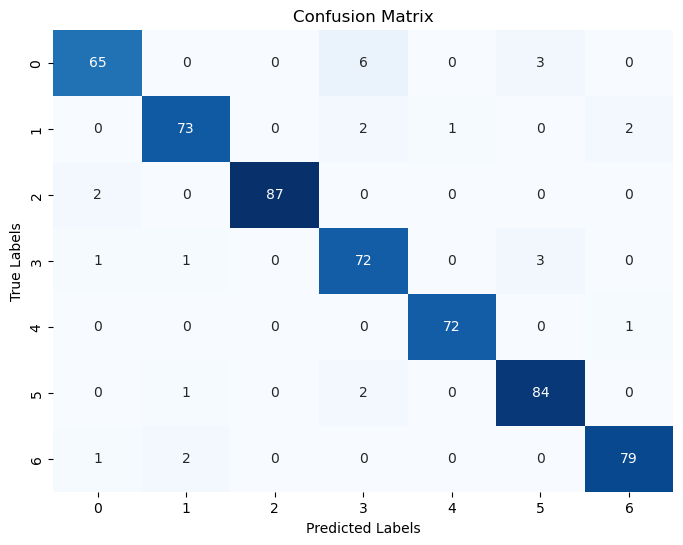

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np


y_pred = model.predict(X_val)
# Converting predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
# Converting one-hot encoded labels to their actual classes
y_true_classes = np.argmax(y_val, axis=1)


conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [30]:
from sklearn.metrics import classification_report


y_pred = model.predict(X_val)
# Converting predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
# Converting one-hot encoded labels to their actual classes
y_true_classes = np.argmax(y_val, axis=1)

# Generating the classification report
class_report = classification_report(y_true_classes, y_pred_classes)
print("Classification Report:")
print(class_report)


18/18 [==============================] - 1s 36ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        74
           1       0.95      0.94      0.94        78
           2       1.00      0.98      0.99        89
           3       0.88      0.94      0.91        77
           4       0.99      0.99      0.99        73
           5       0.93      0.97      0.95        87
           6       0.96      0.96      0.96        82

    accuracy                           0.95       560
   macro avg       0.95      0.95      0.95       560
weighted avg       0.95      0.95      0.95       560



In [31]:
model.save('SER_model.h5')

In [32]:
from tensorflow.keras.models import load_model
SER_model = load_model('model/SER_model.h5')

In [33]:
SER_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

#  CNN

In [34]:
import librosa
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Function to extract Mel Spectrogram
def extract_melspectrogram(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr)
    mel_spec_dB = librosa.power_to_db(mel_spec, ref=np.max)
    return mel_spec_dB

# Extract Mel Spectrograms for all audio files in the DataFrame
X_melspec = df['speech'].apply(lambda x: extract_melspectrogram(x))
   
# Assuming all Mel Spectrograms have the same shape (if not, consider padding or resizing)
max_shape = max(spec.shape for spec in X_melspec)
X_padded = np.array([np.pad(spec, ((0, max_shape[0] - spec.shape[0]), (0, max_shape[1] - spec.shape[1]))).T for spec in X_melspec])

# Add a channel dimension for CNN input
X = X_padded[:, :, :, np.newaxis]

# Prepare labels
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']]).toarray()

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Build CNN model (same as before)
input_shape = X_train[0].shape

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))



Epoch 1/10
70/70 [==============================] - 16s 198ms/step - loss: 7.7525 - accuracy: 0.6821 - val_loss: 0.0430 - val_accuracy: 0.9857
Epoch 2/10
70/70 [==============================] - 14s 195ms/step - loss: 0.0416 - accuracy: 0.9848 - val_loss: 0.0254 - val_accuracy: 0.9946
Epoch 3/10
70/70 [==============================] - 15s 210ms/step - loss: 0.0124 - accuracy: 0.9973 - val_loss: 0.0113 - val_accuracy: 0.9946
Epoch 4/10
70/70 [==============================] - 15s 212ms/step - loss: 0.0029 - accuracy: 0.9991 - val_loss: 0.0093 - val_accuracy: 0.9964
Epoch 5/10
70/70 [==============================] - 15s 214ms/step - loss: 4.9979e-04 - accuracy: 1.0000 - val_loss: 0.0068 - val_accuracy: 0.9964
Epoch 6/10
70/70 [==============================] - 14s 196ms/step - loss: 1.5999e-04 - accuracy: 1.0000 - val_loss: 0.0068 - val_accuracy: 0.9982
Epoch 7/10
70/70 [==============================] - 14s 196ms/step - loss: 7.4848e-05 - accuracy: 1.0000 - val_loss: 0.0075 - val_acc

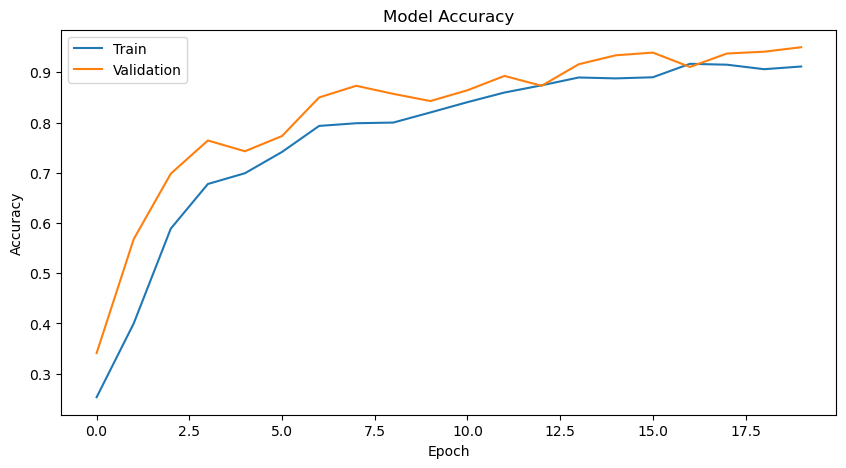

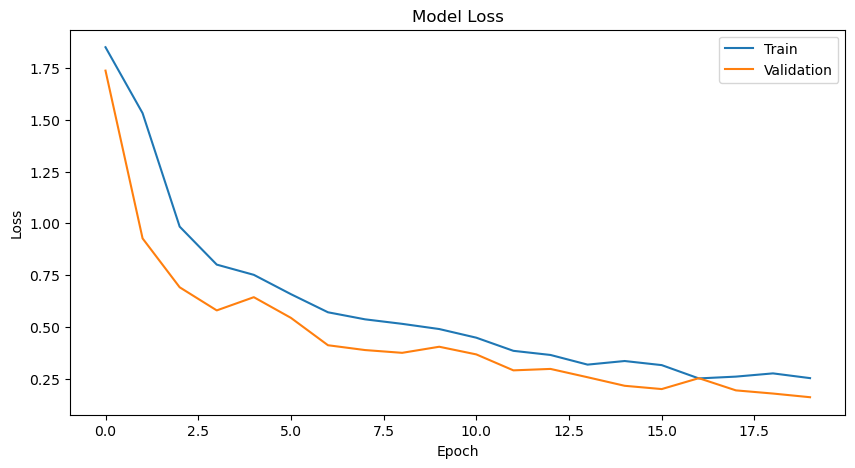

In [35]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [36]:


# Predict on validation/test data for the CNN model
pred_cnn = model.predict(X_val)  # Use X_val or X_test based on your need for validation or final testing

# Decode one-hot encoded labels back to categorical labels
y_pred_cnn = enc.inverse_transform(pred_cnn)
y_true_cnn = enc.inverse_transform(y_val)  # Use y_val or y_test based on your need for validation or final testing

# Create a DataFrame for comparison
df_cnn = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df_cnn['Predicted Labels'] = y_pred_cnn.flatten()
df_cnn['Actual Labels'] = y_true_cnn.flatten()

# Display the comparison for the first 10 entries
print(df_cnn.head(10))


18/18 [==============================] - 1s 75ms/step
  Predicted Labels Actual Labels
0               ps            ps
1            happy         happy
2            happy         happy
3               ps            ps
4             fear          fear
5          disgust       disgust
6              sad           sad
7            angry         angry
8          neutral       neutral
9               ps            ps


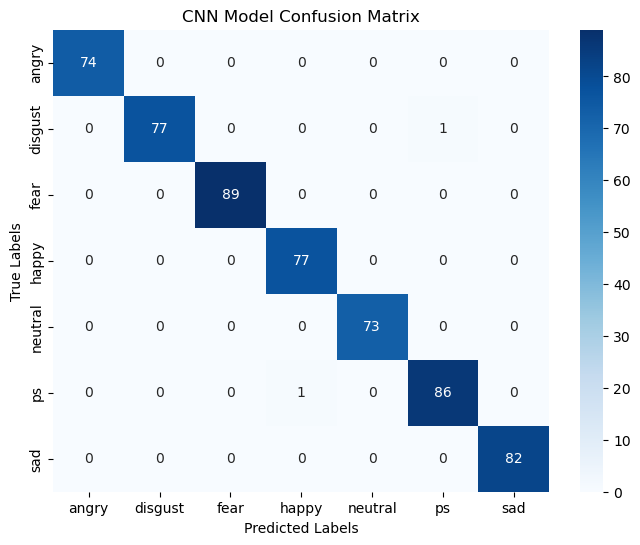

In [37]:

# Get emotion labels from the encoder
emotion_labels = enc.categories_[0]

# Confusion matrix for CNN model with emotion labels
conf_matrix_cnn = confusion_matrix(y_true_cnn, y_pred_cnn)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cnn, annot=True, cmap='Blues', fmt='d', 
            xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.title('CNN Model Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [38]:
from sklearn.metrics import classification_report

# Assuming pred_cnn contains predicted labels and y_true_cnn contains true labels
classification_report_cnn = classification_report(y_true_cnn, y_pred_cnn)

print("Classification Report for CNN Model:")
print(classification_report_cnn)


Classification Report for CNN Model:
              precision    recall  f1-score   support

       angry       1.00      1.00      1.00        74
     disgust       1.00      0.99      0.99        78
        fear       1.00      1.00      1.00        89
       happy       0.99      1.00      0.99        77
     neutral       1.00      1.00      1.00        73
          ps       0.99      0.99      0.99        87
         sad       1.00      1.00      1.00        82

    accuracy                           1.00       560
   macro avg       1.00      1.00      1.00       560
weighted avg       1.00      1.00      1.00       560



In [39]:
import pandas as pd

# Assuming df_cnn contains the predicted labels
# Create a DataFrame with predicted labels
df_predictions = pd.DataFrame(data={'Predicted_Labels': y_pred_cnn.flatten()})  # Assuming y_pred_cnn is your predicted labels

# Save the DataFrame to a CSV file named 'prediction.csv'
df_predictions.to_csv('prediction.csv', index=False)


In [40]:
model.save('CNN_model.h5')



# FOR LSTM MODEL

In [41]:
import librosa
import numpy as np
from keras.models import load_model

# Load the model
model = load_model('model/SER_model.h5')  # Replace with the path to your model file

# Define the predict function
def predict_emotion(audio_file):
    # Extract MFCC features from the audio file
    mfcc = extract_mfcc(audio_file)  # Assuming you've defined this function

    # Reshape the MFCC features to match the model's input shape
    mfcc = mfcc.reshape(1, 40, 1)  # Shape should match (batch_size, num_features, num_timesteps)

    # Make predictions using the loaded model
    predictions = model.predict(mfcc)

    # Get the predicted emotion label
    predicted_label = np.argmax(predictions)

    if predicted_label==0:
        return 'Emotion: Angry'
    elif predicted_label==1:
        return 'Emotion: Disgust'
    elif predicted_label==2:
        return 'Emotion: Fear'
    elif predicted_label==3:
        return 'Emotion: Happy'
    elif predicted_label==4:
        return 'Emotion: Neutral'
    elif predicted_label==5:
        return 'Emotion: Pleasant_surprise'
    else:
        return 'Emotion: Sad'
    #return predicted_label  # Return the index of the predicted emotion category

# FOR CNN MODEL

In [42]:
'''import librosa
import numpy as np
from keras.models import load_model
from sklearn.preprocessing import OneHotEncoder

# Load the model
model = load_model('model/CNN_model.h5')  # Replace with the path to your CNN model file

# Function to extract Mel Spectrogram
def extract_melspectrogram(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr)
    mel_spec_dB = librosa.power_to_db(mel_spec, ref=np.max)
    return mel_spec_dB

# Define the predict function
def predict_emotion(audio_file, enc):
    # Extract Mel Spectrogram features from the audio file
    mel_spec = extract_melspectrogram(audio_file)

    # Assuming all Mel Spectrograms have the same shape
    max_shape = (time_steps, frequency_bins)  # Replace with the shape of your Mel Spectrograms
    mel_spec_padded = np.pad(mel_spec, ((0, max_shape[0] - mel_spec.shape[0]), (0, max_shape[1] - mel_spec.shape[1]))).T

    # Add a channel dimension for CNN input
    mel_spec_input = mel_spec_padded[:, :, np.newaxis]

    # Reshape the input to match the model's expected shape
    mel_spec_input = np.expand_dims(mel_spec_input, axis=0)

    # Make predictions using the loaded model
    predictions = model.predict(mel_spec_input)

    # Get the predicted emotion label
    predicted_label = np.argmax(predictions)

    # Inverse transform the label to get the emotion category
    emotion_category = enc.inverse_transform([[predicted_label]])[0][0]

    return f'Emotion: {emotion_category}'

'''

"import librosa\nimport numpy as np\nfrom keras.models import load_model\nfrom sklearn.preprocessing import OneHotEncoder\n\n# Load the model\nmodel = load_model('model/CNN_model.h5')  # Replace with the path to your CNN model file\n\n# Function to extract Mel Spectrogram\ndef extract_melspectrogram(filename):\n    y, sr = librosa.load(filename, duration=3, offset=0.5)\n    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr)\n    mel_spec_dB = librosa.power_to_db(mel_spec, ref=np.max)\n    return mel_spec_dB\n\n# Define the predict function\ndef predict_emotion(audio_file, enc):\n    # Extract Mel Spectrogram features from the audio file\n    mel_spec = extract_melspectrogram(audio_file)\n\n    # Assuming all Mel Spectrograms have the same shape\n    max_shape = (time_steps, frequency_bins)  # Replace with the shape of your Mel Spectrograms\n    mel_spec_padded = np.pad(mel_spec, ((0, max_shape[0] - mel_spec.shape[0]), (0, max_shape[1] - mel_spec.shape[1]))).T\n\n    # Add a channel 

In [43]:
import sounddevice as sd
from scipy.io import wavfile
from IPython.display import Audio

In [44]:
# Function to record audio and save it to a WAV file
def record_audio(file_path, duration=5):
    print("Recording audio...")
    audio_data = sd.rec(int(duration * 44100), samplerate=44100, channels=1, blocking=True)
    wavfile.write(file_path, 44100, audio_data)
    print(f"Audio saved to {file_path}")
def plot_audio_waveform(audio_file_path):
    # Load the audio file
    y, sr = librosa.load(audio_file_path, sr=None)

    # Plot the waveform
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Audio Waveform')
    plt.show()

In [45]:
# Record and save audio
audio_file_path="save_input_audios/new_audio.wav"
record_audio(audio_file_path)

Recording audio...
Audio saved to save_input_audios/new_audio.wav


In [46]:
# Play the recorded audio
Audio(audio_file_path)

In [47]:
#audio_file_path = ''# Replace with the path to your audio file
predicted_emotion_index = predict_emotion(audio_file_path)
print(predicted_emotion_index)

1/1 [==============================] - 0s 438ms/step
Emotion: Fear


1/1 [==============================] - 0s 24ms/step
Emotion: Happy


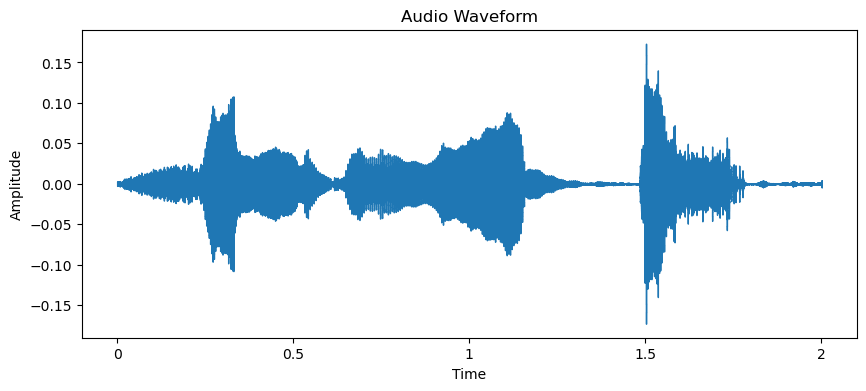

In [48]:
audio_file_path = 'TESS_Toronto_emotional_speech_set_data/OAF_happy/OAF_back_happy.wav'
predicted_emotion_index = predict_emotion(audio_file_path)
print(predicted_emotion_index)
# Plot the audio waveform
plot_audio_waveform(audio_file_path)

In [49]:
model.save('SER_model_updated.h5')